#FLEXION
 Flexión Simple: Cuando en el Centro de Gravedad (CG) de la sección, actúan
simultáneamente una resultante de Momentos Flectores (M) y una resultante de
Fuerzas Cortantes (P)

 Flexión pura: Cuando en el CG actúa solamente la resultante de los Momentos
Flectores (M).

Línea neutra: es el lugar geométrico de los puntos de una sección recta, que no sufren
deformación δ, y, por lo tanto, tampoco sufren tensión σ. En Flexión simple y Flexión pura
siempre coincide con el eje en el cual la resultante de momentos es aplicada alrededor, el cual
también es un eje principal.





(0.0, 0.2, -0.5, 0.5)

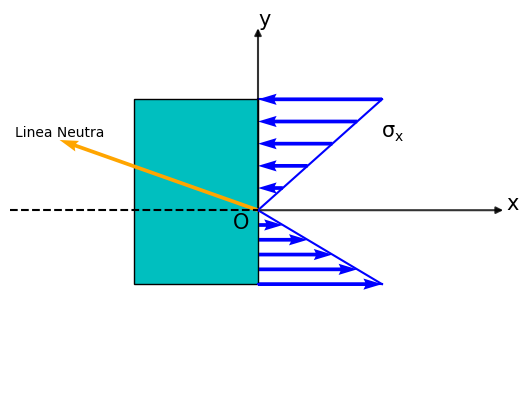

In [ ]:
#@title 1. Diagrama de Esfuerzo Normal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Rectangle


plt.annotate('', xy=(0.2, 0), xytext=(0.1, 0),
             arrowprops=dict(arrowstyle='-|>', linewidth=1.5, color='black',alpha = 0.8))
plt.annotate('', xy=(0.1,0.5), xytext=(0.1, 0),
             arrowprops=dict(arrowstyle='-|>', linewidth=1.5, color='black',alpha = 0.8))


plt.plot([0.1,0.15],[0,0.3],color='blue')
plt.plot([0.1,0.15],[0,-0.2],color='blue')
plt.plot([0.1,0.15],[0.3,0.3],color='blue')
plt.plot([0.1,0.15],[-0.2,-0.2],color='blue')
plt.plot([0,0.1],[0,0],linestyle='--',color='black')

a = np.arange(0.11,0.16,0.01)
for i in a:
  plt.quiver(i, (0.3/0.05)*i+(0.3-(0.3/0.05)*0.15), -(i-0.1), 0, angles='xy', scale_units='xy', scale=1, color='blue')
for i in a:
  plt.quiver(0.1, -(0.2/0.05)*i-(0.2-(0.2/0.05)*0.15), (i-0.1), 0, angles='xy', scale_units='xy', scale=1, color='blue')


plt.text(0.15,0.2, "σ", fontsize=15, color='black')
plt.text(0.155,0.19, "x", fontsize=10, color='black')
plt.text(0.1,0.5, "y", fontsize=15, color='black')
plt.text(0.2,0.001, "x", fontsize=15, color='black')
plt.text(0.09,-0.05,"O", fontsize=15, color='black')
plt.text(0.002,0.2,"Linea Neutra",fontsize=10,color='black')



barraAB = Rectangle((0.05,-0.2),0.05, 0.5, facecolor = 'c', edgecolor='black')
plt.gca().add_patch(barraAB)
plt.quiver(0.1,0,-0.08,0.19,angles='xy', scale_units='xy', scale=1, color='orange')
plt.ylim(-0.5,0.5)
plt.xlim(0,0.2)
plt.axis("off")

##2. Diagrama de Fuerza Cortante y Momento Flector


$$\frac{dM}{dx}=V$$

EDO Metodo de Euler:
$$y(t_{k+1}) = y(t_k) + hf(t_k ,y_k)$$

Reemplazando por notaciones para encontrar el momento flector quedaria:
$$M(x_{k+1}) = M(x_k) + h*V(x_k)$$

h: paso entre los valores de x

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def plotQyM(Fuerzas,Puntos,L_barra,paso,M0,q=None,x0=None,xf=None,grafico=True):

  #Fuerzas Cortantes
  i=0
  x = []
  V = []
  FuerzaActual = 0
  inicio = 0
  if(q!=None):
    Puntos = sorted(Puntos + [x0,xf])
    a = Puntos.index(x0)
    b = Puntos.index(xf)
    Fuerzas.insert(a,q)
    Fuerzas.insert(b,q)

  for p in Puntos:
    x = x+list(np.arange(inicio,p,paso))
    inicio = p
  x.append(Puntos[-1])
  if(x[-1]<L_barra):
    x = x+list(np.arange(x[-1],L_barra,paso))
  for j in x:
    if((j==Puntos[i])):
      if(q!=None):
        if(j==Puntos[a]):
          for k in x[x.index(Puntos[a]):x.index(Puntos[b])]:
            V.append(FuerzaActual + Fuerzas[a]*(k-Puntos[a]))
        elif(j==Puntos[b]):
          FuerzaActual += Fuerzas[b]*(Puntos[b]-Puntos[a])
          V.append(FuerzaActual)
        else:
          FuerzaActual += Fuerzas[i]
          V.append(FuerzaActual)
      else:
        FuerzaActual += Fuerzas[i]
        V.append(FuerzaActual)
      if(i<len(Puntos)-1):
        i += 1

    else:
      if(q!=None):
        if(j<Puntos[a] or j>Puntos[b]):
          V.append(FuerzaActual)
      else:
        V.append(FuerzaActual)

  #Momento Flector
  M = []
  M.append(M0)
  for i in range(0,len(V)-1):
    M.append(M[i]+paso*V[i])

  ##Grafico
  if(grafico):
    fig,ax = plt.subplots(2,1)
    ax = fig.axes[0]
    ax.plot(x,V)
    ax.set_ylabel("Fuerza Cortante")
    ax.set_title("Diagrama de Fuerza Cortante y Momento Flector")
    ax.set_xlim(0,L_barra)
    ax = fig.axes[1]
    ax.plot(x,M)
    ax.set_ylabel("Momento Flector")
    ax.set_xlabel("Longitud")
    ax.set_xlim(0,L_barra)
    fig.tight_layout()
    plt.show()
  return M,V,x


<function matplotlib.pyplot.show(close=None, block=None)>

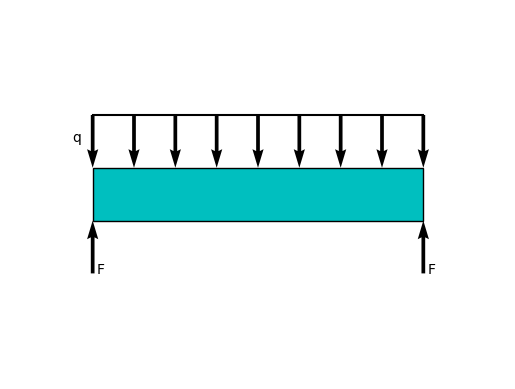

In [ ]:
#@title Ejemplo de una distribucion de cargas en una viga
barraAB = Rectangle((0,0), 0.8, 0.1, facecolor = 'c', edgecolor='black')
plt.gca().add_patch(barraAB)

puntos = [(0,0),(0.8,0)]

plt.quiver(0,-0.1,0,0.1,angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(0.8,-0.1,0,0.1,angles='xy', scale_units='xy', scale=1, color='black')

aux = np.arange(0,0.9,0.1)
for k in aux:
  plt.quiver(k,0.2,0,-0.1,angles='xy', scale_units='xy', scale=1, color='black')
plt.plot([0,0.8],[0.2,0.2],color='black')

plt.text(-0.05,0.15,'q')
plt.text(0.01,-0.1,'F')
plt.text(0.81,-0.1,'F')


plt.xlim(-0.2,1)
plt.ylim(-0.3,0.4)
plt.axis('off')
plt.show

Para el analisis de los diagramas de fuerzas internas, es recomendable realizar el metodo de superposicion de efecto, que se analiza el efecto de cada fuerza y luego se superponen el efecto. En los graficos siguientes se podra ver el efecto solo de la carga distribuida y luego el efecto de las dos cargas puntuales y por ultimo se suman esas dos graficas teniendo como resultado el diagrama de todas las cargas aplicadas en la viga.

Fuerza distribuida


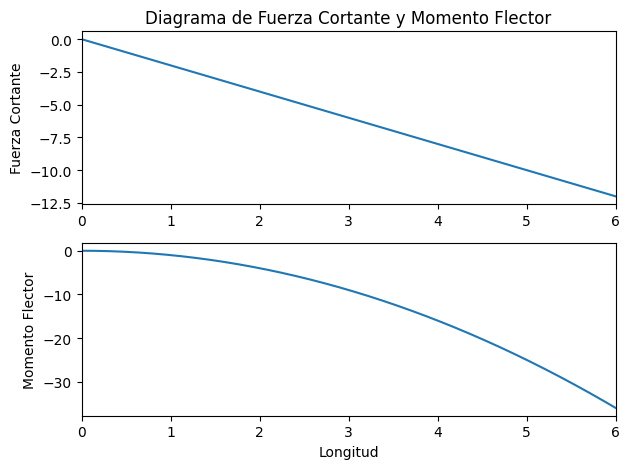

Fuerzas Puntuales


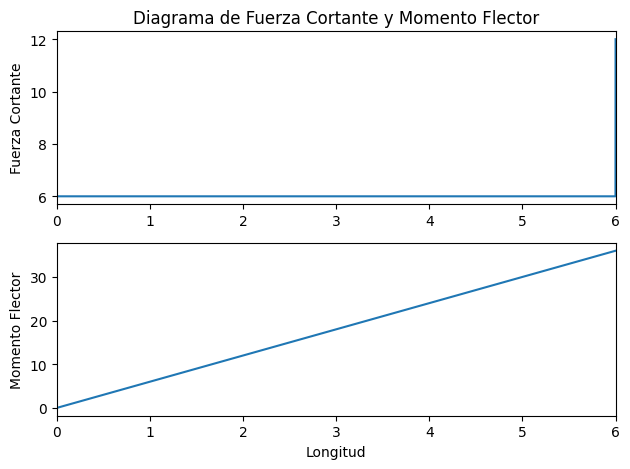

Superposicion de Efectos


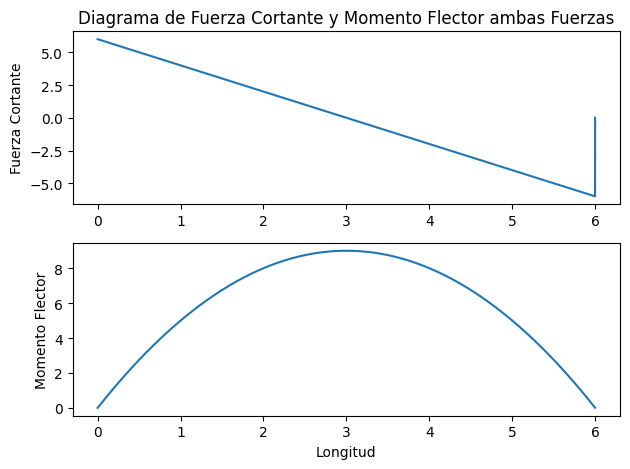

In [ ]:
Longitud = 6
Fuerzas = [6,6]
puntos = [0,6]
paso = 0.001
print('Fuerza distribuida')
M1,V1,x1 = plotQyM([],[],Longitud,paso,0,q=-2,x0=0,xf=6)
print('Fuerzas Puntuales')
M2,V2,x2 = plotQyM(Fuerzas,puntos,Longitud,paso,0)
M = np.array(M1)+np.array(M2)
V = np.array(V1)+np.array(V2)
x = x1
print('Superposicion de Efectos')
fig,ax = plt.subplots(2,1)
ax = fig.axes[0]
ax.plot(x,V)
ax.set_ylabel("Fuerza Cortante")
ax.set_title("Diagrama de Fuerza Cortante y Momento Flector ambas Fuerzas")
ax = fig.axes[1]
ax.plot(x,M)
ax.set_ylabel("Momento Flector")
ax.set_xlabel("Longitud")
fig.tight_layout()



###Ejercicio de Ejemplo
Una viga en voladizo de madera que pesa 0.75 kN/m soporta una fuerza concetrada arriaba de 20 kN en su extremo. Determine los esfuerzos maximos y donde. Longitud de la viga L = 6 m.



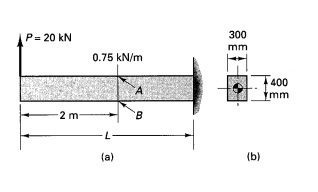

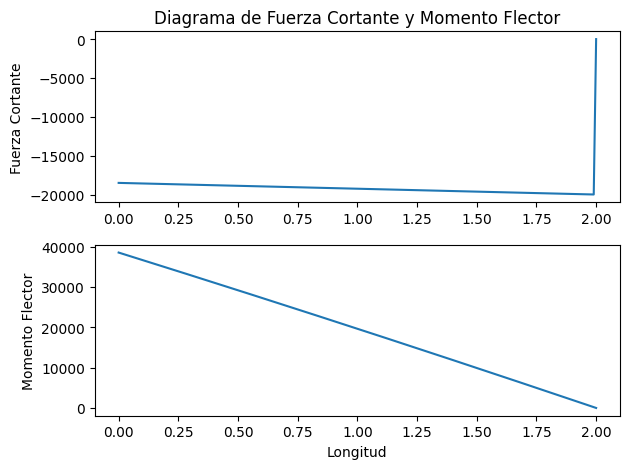

El esfuerzo maximo es: 4812500.000000 Pa
Ocurren en la posicion x: 0.000000 m


In [ ]:
# Datos

Longitud = 2
b = 0.3
h = 0.4
I = b*(h**3)/12

# Sumatoria de Fuerzas en y: 20-0.75*6 + Ry = 0
# Sumatoria de Momentos en el empotramiento: M0 + 0.75*6*0.5*6 - 20*6 =0

Fuerzas = [750*2-20000,20000]
Puntos = [0,2]
M0 = 20000*2-750*2*0.5*2
paso = 0.01

M1,V1,x1 = plotQyM(Fuerzas,Puntos,Longitud,paso,M0,grafico=False)
M2,V2,x2 = plotQyM([],[],Longitud,paso,0,grafico=False,q=-750,x0=0,xf=2)
M = np.array(M1)+np.array(M2)
V = np.array(V1)+np.array(V2)
x = x1
fig,ax = plt.subplots(2,1)
ax = fig.axes[0]
ax.plot(x,V)
ax.set_ylabel("Fuerza Cortante")
ax.set_title("Diagrama de Fuerza Cortante y Momento Flector")
ax = fig.axes[1]
ax.plot(x,M)
ax.set_ylabel("Momento Flector")
ax.set_xlabel("Longitud")
fig.tight_layout()
plt.show()

print('El esfuerzo maximo es: %f Pa' %((max(M)*(h/2))/I))
print('Ocurren en la posicion x: %f m' %x[list(M).index(max(M))])



##3. Deflexion en la Flexion
Cuando un viga con un eje longitudinal recto se carga con fuerzas laterales, el eje se deforma y adopta una forma curva, denominada curva de
deflexión o curva elastica de la viga.

La *deflexión* y es el desplazamiento en la dirección y de cualquier punto sobre el eje de la viga.


Ecuación diferencial de la deflexión:

$$ {\frac{d^{2}y}{dx^2}=\frac{M}{EI}}$$

### Problema de Contorno Metodo de Diferencias finitas

Se tiene una EDO:
$$ x''(t) = p(t)x'(t)+q(t)x(t)+r(t)$$


Aproximacion de la primera derivada:
$$x'(t_j)=\frac{x(t_j+1)-x(t_j-1)}{2h}$$

Aproximacion de la segunda derivada:
$$x''(t_j) = \frac{x(t_{j+1})-2x(t_{j})+x(t_{j-1})}{2h}$$

Donde h es el paso, entonces:
$$t_{j+1} = t_j + h$$

Reemplazando esas ecuaciones en la EDO, se tiene:
$$ \frac{x(t_{j+1})-2x(t_{j})+x(t_{j-1})}{2h} = p(t)\frac{x(t_{j+1})-x(t_{j-1})}{2h}+q(t)x(t)+r(t) $$

Luego de desarrollar matematicamente y ordenando la ecuacion se tiene:
$$ (\frac{-h}{2}p_j-1)x_{j-1} + (2+h^{2}q_j)x_j + (\frac{h}{2}p_j-1)x_{j+1} = -h^2r_j $$

Cambiando las notaciones y ajustando el caso para la deflexion quedaria:
$$ p(x) = 0 ; q(x) = 0;r(x)=\frac{M}{EI}$$

$$ -y_{j-1} + 2y_j -y_{j+1} = -h^2\frac{M_j}{EI} $$

###Implententacion del Metodo Numerico

In [ ]:
### Problemas de contorno

def plotElastica(M,x,y0,yf,paso,E,I,grafico=True):


  a = x[0]
  b = x[-1]
  alfa = y0
  beta = yf

  h = paso

  #t = arange(a+h,b,h)
  t = x[1:len(x)-1]
  DP = np.zeros(len(t))
  DS = np.zeros(len(t)-1)
  DI = np.zeros(len(t)-1)
  B = np.zeros(len(t))
  for j in range(0,len(t)):
      DP[j] = 2
      if j > 0:
          DI[j-1] = -1
      if j < len(t)-1:
          DS[j] = -1

  B = -((h**2)/(E*I))*np.array(M[1:len(M)-1])
  B[0] = B[0] + alfa
  B[j] = B[j] + beta
  A = np.diag(DP) + np.diag(DS,1) + np.diag(DI,-1)

  ### X = inv(A)*B
  N = len(B)
  B = np.array([B])
  X = np.dot(np.linalg.inv(A),(B.T))
  X = np.insert(X,0,alfa)
  X = np.insert(X,len(X),beta)
  t = np.insert(t,0,a)
  t = np.insert(t,len(t),b)

  ##Grafico
  if(grafico==True):
    plt.plot(t,X)
    plt.plot([t[0],t[-1]],[0,0],color='black')
  return X


###Ejercicios Practicos


Una viga simple AB soporta dos cargas concetradas P en las posiciones que se muestran en la figura. El apoyo C a la mitad del claro de la viga está ubicado a una distancia d debajo de la viga antes que se apliquen la cargas.


$d = 10 mm$

$L = 6m$

$E = 200 GPa$

$I = 198⋅10^6$

Calcule la magnitud de las cargas P tal que la viga apenas toque el apoyo en C.



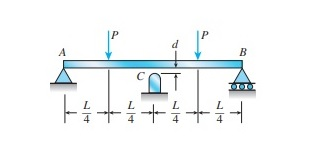



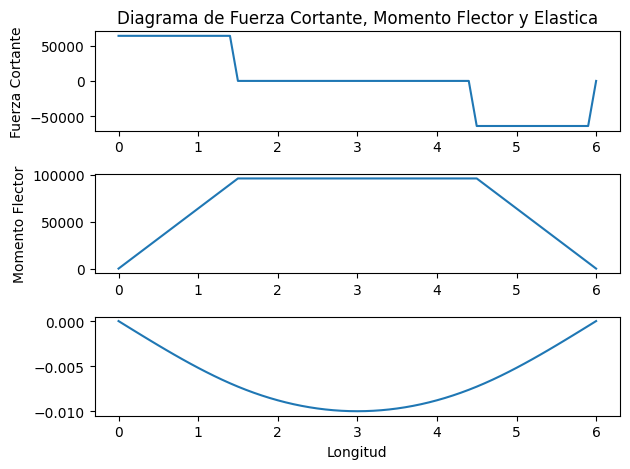

La maxima carga P es: 63974 N
deflexion aprox: -0.010000 m


In [ ]:
#Datos
L = 6 # metros
E = 200*(10**9) # Pa
I = 198*(10**6)*((10**(-3))**4) #m^4
d = 10*(10**(-3)) # m
Puntos = [0,L/4,3*L/4,L]

paso = 0.01


for p in range(60000,70000):
  Fuerzas = [p,-p,-p,p]
  M,V,x = plotQyM(Fuerzas,Puntos,L,paso,0,grafico=False)
  Y = plotElastica(M,x,0,0,paso,E,I,grafico=False)
  aux = sorted(Y)

  if(abs(abs(aux[0])-d)<=0.0000001):
    break

#Grafico
fig,ax = plt.subplots(3,1)
ax = fig.axes[0]
ax.plot(x,V)
ax.set_ylabel("Fuerza Cortante")
ax.set_title("Diagrama de Fuerza Cortante, Momento Flector y Elastica")
ax = fig.axes[1]
ax.plot(x,M)
ax.set_ylabel("Momento Flector")
ax = fig.axes[2]
ax.set_xlabel("Longitud")
ax.plot(x,Y)
fig.tight_layout()
plt.show()

print("La maxima carga P es: %s N" %p )
print("deflexion aprox: %1.6f m" %aux[0])

###Primer Teorema de Mohr
El ángulo $\theta_{B/A}$ entre las tangentes a la curva de deflexión en dos puntos $A$ y $B$ es igual al área del diagrama $M/EI$ entre
esos puntos.

Ecuacion diferencial:

$$\frac{dθ}{dx} = \frac{M}{EI}$$


Hallando $θ$ se puede encontrar las deflexiones con la siguiente ecuacion:

$$\theta = \frac{dy}{dx}$$

In [2]:
def PrimerMohr(M,x,E,I,paso,tita0):
  tita = []
  tita.append(tita0)
  for i in range(0,len(M)-1):
    tita.append(tita[i]+(paso*M[i])/(E*I))
  return tita

def Deflexion(M,x,E,I,paso,tita0,y0):
  tita = PrimerMohr(M,x,E,I,paso,tita0)
  y = []
  y.append(y0)
  for i in range(0,len(tita)-1):
    y.append(y[i]+(paso*tita[i]))
  return tita

###Ejercicio Practico

Una viga en voladizo $ACB$ soporta dos cargas concentradas P1 y P2 como se muestra en la figura. Calcule las deflexiones en los puntos B y C.

DATOS:

$P_1 = 10 kN$

$P_2 = 5 kN$

$L = 2.6 m$

$E = 200 GPa$

$I = 20.1⋅10^6 mm^4$



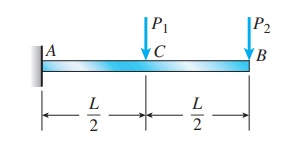



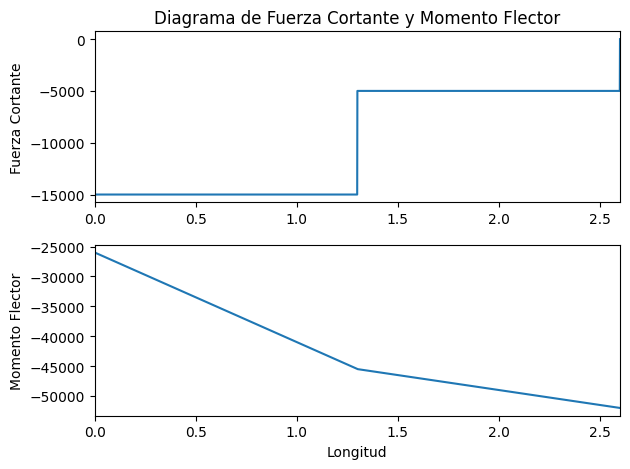

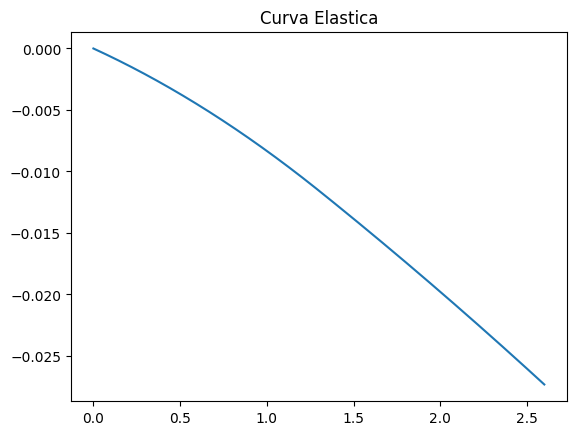

La deflexion en B es: -0.027323 m


In [ ]:
# Datos

L = 2.6
E = 200*(10**9)
I = 20.1*(10**6)*((10**(-3))**4)

# Sumatoria de Fuerzas : R = P1+P2
# Sumatoria de Momentos: M = P1*L/2 +P2*L

P1 = 10000
P2 = 5000

Fuerzas = [-P1-P2,+P1,+P2]
Puntos = [0,L/2,L]

M0 = -(P1*(L/2) + P2*L)

paso = 0.001
M,V,x = plotQyM(Fuerzas,Puntos,L,paso,M0)
y = Deflexion(M,x,E,I,paso,0,0)

plt.plot(x,y)
plt.title("Curva Elastica")
print("\n")
plt.show()


print('La deflexion en B es: %f m'%y[-1])